In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df = pd.read_parquet('/Users/cassidy.hilton/Cursor Projects/unitFocus/data/FCT_PROMO_HOTLIST_FULL.parquet')

df

,ITEM_ID,ITEM_NAME,CATEGORY,LOCATION_ID,LOCATION_NAME,REGION,STATE,ZIP_CODE,LATITUDE,LONGITUDE,CITY,PROMO_TYPE,PLANNED_LIFT,PRICE_PLAN,OBSERVED_PRICE,BASELINE_UNITS,EXPECTED_DAY_UNITS,SNAPSHOTS_SEEN,DAY_ELAPSED_SHARE,UNITS_SOLD_SO_FAR,EXPECTED_SO_FAR_UNITS,TRENDING_GAP_UNITS,ONHAND_START,BACKROOM_START,ONHAND_LATEST,OSA_FLAG,ROOT_CAUSE_CODE,PRICE_MISMATCH_FLAG,PRICE_MISMATCH_DIFF,REVENUE_SO_FAR_USD,EXPECTED_REVENUE_SO_FAR_USD,REVENUE_GAP_SO_FAR_USD,REVENUE_FORECASTED_USD,PCT_TO_PLAN_SO_FAR,UNITS_PER_SNAPSHOT,EXPECTED_UNITS_PER_SNAPSHOT,REPLENISH_NOW_FLAG,STALLED_DISPLAY_FLAG,PRIORITY_SCORE,UNDERPERFORMING_FLAG,OOS_RISK_FLAG,OPENING_IMAGE_URL,MIDDAY_IMAGE_URL,MIDDAY_COMPLIANCE_LABEL,LAST_SNAPSHOT_AT
0,SKU90026,LittleSteps Diapers 36ct - Size 2,Baby Care,TGT1005,Target Aurora #1005,Northeast,NJ,07102,40.7357,-74.1724,Newark,TPR,1.25,2.70,2.75,32,40.00,9,1.0,41,40.00,-1.00,210,111,236,1,None,0,0.0,112.91,108.002,-4.908,112.91,1.025000,4.555556,4.444444,0,0,0.000,0,0,/img/open/CanyonCola Energy 12oz - Berry.png,/img/midday/CanyonCola Energy 12oz - Berry.png,NON_COMPLIANT,2025-02-27 16:00:00
1,SKU90022,MorningFlakes Cereal 10oz - Honey,Breakfast & Cereal,TGT1006,Target Lakewood #1006,Northeast,CT,06103,41.7658,-72.6734,Hartford,TPR+Display,1.45,2.26,2.25,36,52.20,9,1.0,49,52.20,3.20,142,49,133,1,None,0,0.0,110.28,118.194,7.914,110.28,0.938697,5.444444,5.800000,0,0,7.914,0,0,/img/open/CanyonCola Energy 12oz - Berry.png,/img/midday/CanyonCola Energy 12oz - Berry.png,COMPLIANT,2025-02-27 16:00:00
2,SKU90015,LittleSteps Diapers 72ct - Size 2,Baby Care,TGT1007,Target Greeley #1007,Mountain,CO,80202,39.7525,-104.9995,Denver,Base,1.00,2.69,2.76,25,25.00,9,1.0,26,25.00,-1.00,60,25,55,1,None,0,0.0,71.86,67.207,-4.653,71.86,1.040000,2.888889,2.777778,0,0,0.000,0,0,/img/open/CanyonCola Energy 12oz - Berry.png,/img/midday/CanyonCola Energy 12oz - Berry.png,COMPLIANT,2025-02-27 16:00:00
3,SKU90021,SugarRush Gummies Regular - Sour,Candy & Confectionery,TGT1009,Target Arvada #1009,Northeast,NY,10001,40.7506,-73.9970,NewYork,TPR+Display,1.45,2.67,2.76,38,55.10,9,1.0,55,55.10,0.10,216,140,244,1,Poor Shelf Placement,0,0.0,152.02,146.939,-5.081,152.02,0.998185,6.111111,6.122222,0,0,0.000,0,0,/img/open/CanyonCola Energy 12oz - Berry.png,/img/midday/CanyonCola Energy 12oz - Berry.png,COMPLIANT,2025-02-27 16:00:00
4,SKU98008,CanyonCola Energy 12oz - Lime,Specialty Beverages,TGT1009,Target Arvada #1009,Northeast,NY,10001,40.7506,-73.9970,NewYork,TPR+Display,1.45,2.52,2.51,28,40.60,9,1.0,35,40.60,5.60,133,82,166,1,None,0,0.0,87.68,102.407,14.727,87.68,0.862069,3.888889,4.511111,0,0,14.917,1,0,/img/open/CanyonCola Energy 16oz - Lime.png,/img/midday/CanyonCola Energy 16oz - Lime.png,NON_COMPLIANT,2025-02-27 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SKU90027,VoltRush Energy 20oz - Citrus,Specialty Beverages,TGT1046,Target Lakewood #1046,Northeast,NJ,07102,40.7357,-74.1724,Newark,Base,1.00,2.46,2.54,36,36.00,9,1.0,30,36.00,6.00,78,19,59,1,None,0,0.0,76.07,88.496,12.426,76.07,0.833333,3.333333,4.000000,0,0,12.759,1,0,/img/open/VoltRush Energy 16oz - Citrus.png,/img/midday/VoltRush Energy 16oz - Citrus.png,COMPLIANT,2025-10-25 16:00:00
9996,SKU90019,PawPrime Dog Food 3lb - Turkey,Pet Care,TGT1049,Target Lakewood #1049,Mountain,CO,80202,39.7525,-104.9995,Denver,TPR+Display,1.45,2.51,2.47,47,68.15,9,1.0,67,68.15,1.15,225,95,230,1,None,0,0.0,165.47,170.866,5.396,165.47,0.983125,7.444444,7.572222,0,0,5.396,0,0,/img/open/CanyonCola Energy 12oz - Berry.png,/img/midday/CanyonCola Energy 12oz - Berry.png,COMPLIANT,2025-10-25 16:00:00
9997,SKU90005,SnugFit Diapers 72ct - Sensitive,Baby Care,TGT1050,Target Aurora #1050,South,GA,30303,33.7537,-84.3863,Atlanta,TPR,1.25,2.63,2.63,36,45.00,9,1.0,42,45.00,3.00,140,17,113,1,None,0,0.0,110.43,118.176,7.746,110.43,0.933333,4.666667,5.000000,0,0,7.746,0,0,/img/open/CanyonCola 

In [3]:
import pandas as pd

# Ensure datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Today (normalized to date only)
today = pd.Timestamp.today().date()

# Sum of OOS_RISK_FLAG for today
oos_today = df.loc[df['LAST_SNAPSHOT_AT'].dt.date == today, 'OOS_RISK_FLAG'].sum()

print("OOS Risk Flag Sum for Today:", oos_today)


import pandas as pd

# Ensure datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Define start of the current week (Monday)
today = pd.Timestamp.today().normalize()
week_start = today - pd.Timedelta(days=today.weekday())  # Monday of this week

# Filter and sum
oos_this_week = df.loc[
    (df['LAST_SNAPSHOT_AT'] >= week_start) & (df['LAST_SNAPSHOT_AT'] <= today),
    'OOS_RISK_FLAG'
].sum()

print("OOS Risk Flag Sum for This Week:", oos_this_week)


OOS Risk Flag Sum for Today: 0
OOS Risk Flag Sum for This Week: 0


In [4]:
df['CATEGORY'].unique()

array(['Baby Care', 'Breakfast & Cereal', 'Candy & Confectionery',
       'Specialty Beverages', 'Pantry', 'Snacks', 'Household Cleaning',
       'Bakery', 'Pet Care', 'Dairy & Eggs', 'Frozen Foods',
       'Meat & Seafood', 'Personal Care', 'Produce'], dtype=object)

In [5]:
#df[~(df['CATEGORY'] == 'Specialty Beverages')]['ITEM_NAME'].unique()
df['ITEM_NAME'].unique()


array(['LittleSteps Diapers 36ct - Size 2',
       'MorningFlakes Cereal 10oz - Honey',
       'LittleSteps Diapers 72ct - Size 2',
       'SugarRush Gummies Regular - Sour',
       'CanyonCola Energy 12oz - Lime', 'CanyonCola Energy 20oz - Peach',
       'VoltRush Energy 20oz - Citrus', 'PastaPrima Pasta 16oz - Alfredo',
       'CrunchTime Chips 1oz - Sour Cream',
       'CleanMaster All-Purpose Cleaner 32oz - Lemon',
       'DailyBread Bread 12ct - White', 'TailTreat Dog Food 16lb - Beef',
       'GoldenHen Milk Half Gallon - Cage-Free',
       'QuickHeat Pizza 12oz - Pepperoni',
       'VoltRush Energy 16oz - Citrus',
       'CanyonCola Energy 20oz - Tropical',
       'ZenFizz Energy 16oz - Tropical', 'PrimeCuts Ground Beef 1lb',
       'QuickHeat Pizza 12oz - Veggie', 'CanyonCola Energy 16oz - Lime',
       'WhiskerWell Dog Food 16lb - Chicken',
       'CanyonCola Energy 16oz - Peach',
       'SugarRush Gummies Share Size - Chocolate',
       'PurePlus Toothpaste Travel - Whitening

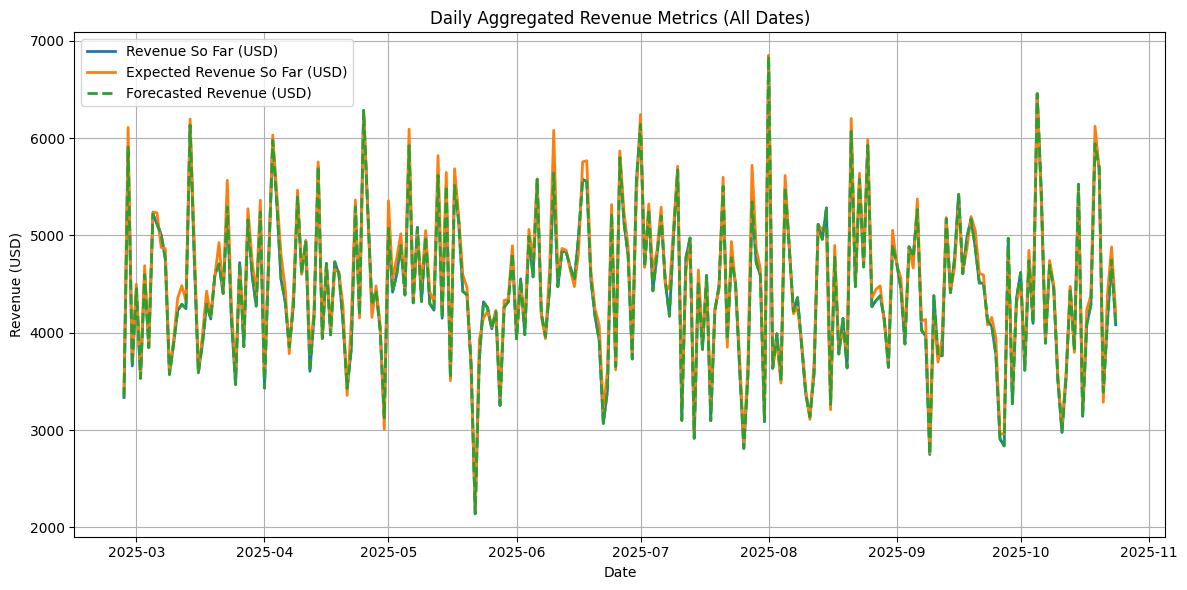

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Aggregate (sum) by calendar day across the full dataset
df_daily_all = (
    df
    .assign(DATE=df['LAST_SNAPSHOT_AT'].dt.floor('D'))
    .groupby('DATE', as_index=False)
    .agg({
        'REVENUE_SO_FAR_USD': 'sum',
        'EXPECTED_REVENUE_SO_FAR_USD': 'sum',
        'REVENUE_GAP_SO_FAR_USD': 'sum',
        'REVENUE_FORECASTED_USD': 'sum'
    })
)

# (Optional) make the timeline continuous and fill missing days with 0
# Uncomment this block if you want every calendar day represented
# full_idx = pd.date_range(df_daily_all['DATE'].min(), df_daily_all['DATE'].max(), freq='D')
# df_daily_all = (
#     df_daily_all.set_index('DATE')
#     .reindex(full_idx)
#     .fillna(0.0)
#     .rename_axis('DATE')
#     .reset_index()
# )

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_daily_all['DATE'], df_daily_all['REVENUE_SO_FAR_USD'], label='Revenue So Far (USD)', linewidth=2)
plt.plot(df_daily_all['DATE'], df_daily_all['EXPECTED_REVENUE_SO_FAR_USD'], label='Expected Revenue So Far (USD)', linewidth=2)
#plt.plot(df_daily_all['DATE'], df_daily_all['REVENUE_GAP_SO_FAR_USD'], label='Revenue Gap So Far (USD)', linewidth=2)
plt.plot(df_daily_all['DATE'], df_daily_all['REVENUE_FORECASTED_USD'], label='Forecasted Revenue (USD)', linewidth=2, linestyle='--')

plt.title('Daily Aggregated Revenue Metrics (All Dates)')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


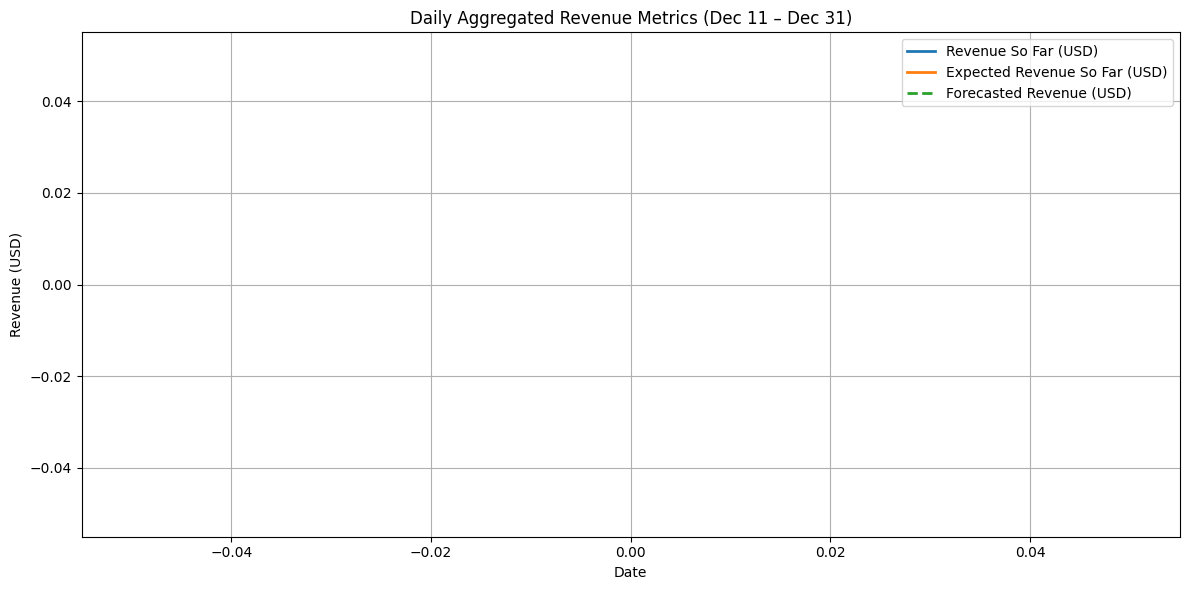

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure LAST_SNAPSHOT_AT is datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Filter date range
start_date = "2024-12-11"
end_date = "2024-12-31"
df_filtered = df[(df['LAST_SNAPSHOT_AT'] >= start_date) & (df['LAST_SNAPSHOT_AT'] <= end_date)]

# Aggregate (sum) by day
df_daily = df_filtered.groupby(df_filtered['LAST_SNAPSHOT_AT'].dt.date).agg({
    'REVENUE_SO_FAR_USD': 'sum',
    'EXPECTED_REVENUE_SO_FAR_USD': 'sum',
    'REVENUE_GAP_SO_FAR_USD': 'sum',
    'REVENUE_FORECASTED_USD': 'sum'
}).reset_index()

# Rename for clarity
df_daily.rename(columns={'LAST_SNAPSHOT_AT': 'DATE'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_daily['DATE'], df_daily['REVENUE_SO_FAR_USD'], label='Revenue So Far (USD)', linewidth=2)
plt.plot(df_daily['DATE'], df_daily['EXPECTED_REVENUE_SO_FAR_USD'], label='Expected Revenue So Far (USD)', linewidth=2)

plt.plot(df_daily['DATE'], df_daily['REVENUE_FORECASTED_USD'], label='Forecasted Revenue (USD)', linewidth=2, linestyle='--')

plt.title('Daily Aggregated Revenue Metrics (Dec 11 – Dec 31)')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


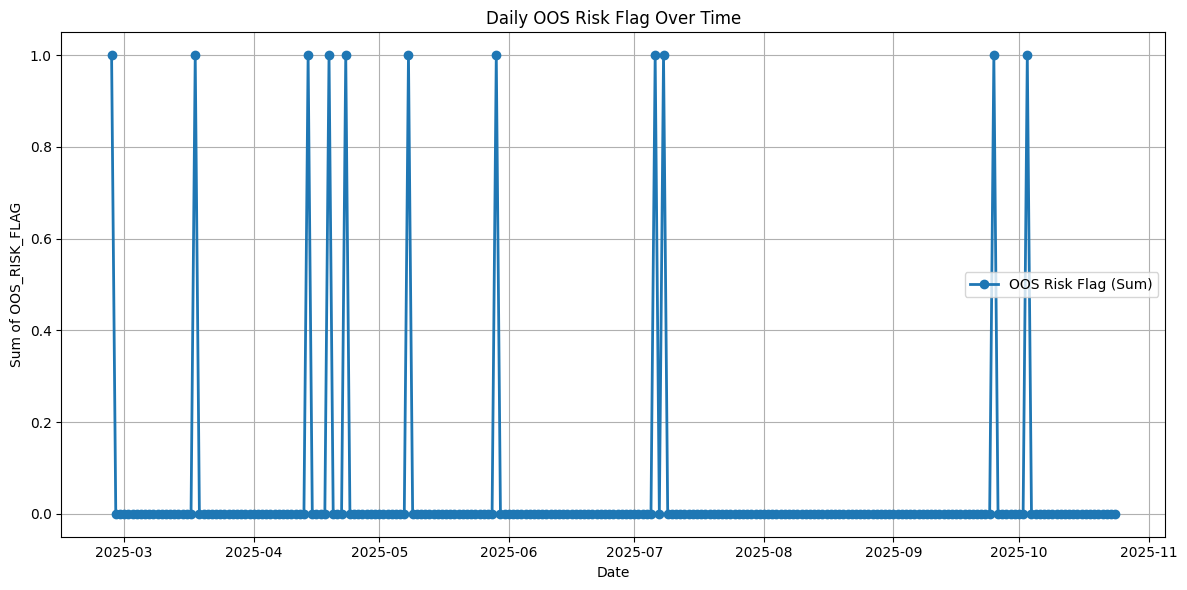

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Aggregate daily sum of OOS_RISK_FLAG
df_risk_daily = (
    df
    .assign(DATE=df['LAST_SNAPSHOT_AT'].dt.floor('D'))
    .groupby('DATE', as_index=False)['OOS_RISK_FLAG']
    .sum()
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_risk_daily['DATE'], df_risk_daily['OOS_RISK_FLAG'], marker='o', linewidth=2, label='OOS Risk Flag (Sum)')

plt.title('Daily OOS Risk Flag Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of OOS_RISK_FLAG')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


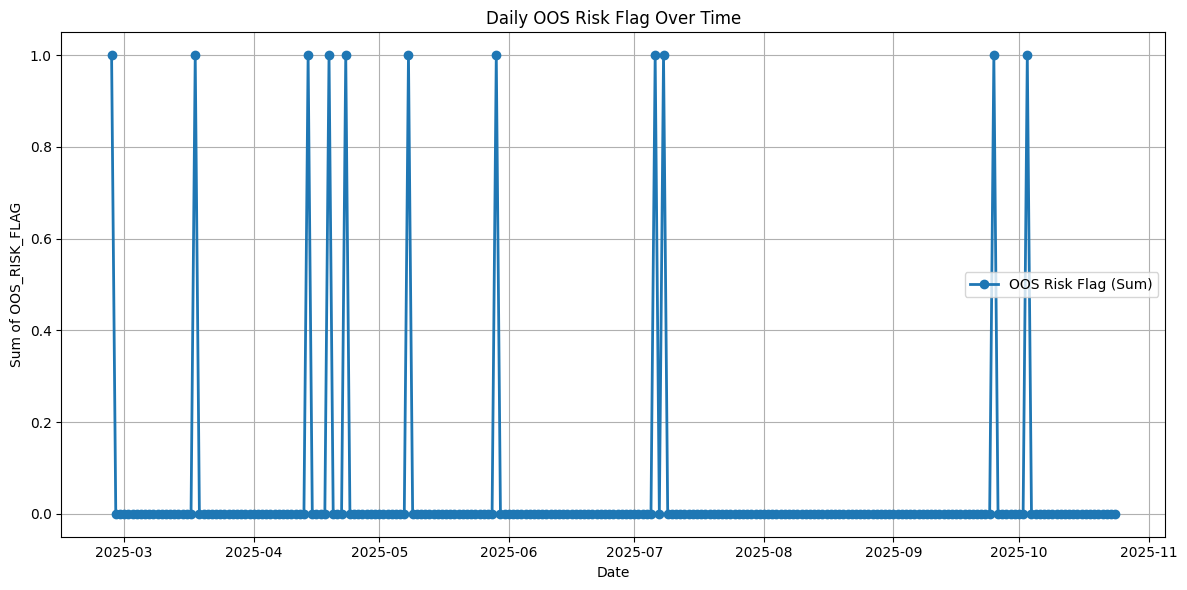

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['LAST_SNAPSHOT_AT'] = pd.to_datetime(df['LAST_SNAPSHOT_AT'])

# Aggregate daily sum of OOS_RISK_FLAG
df_risk_daily = (
    df
    .assign(DATE=df['LAST_SNAPSHOT_AT'].dt.floor('D'))
    .groupby('DATE', as_index=False)['OOS_RISK_FLAG']
    .sum()
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_risk_daily['DATE'], df_risk_daily['OOS_RISK_FLAG'], marker='o', linewidth=2, label='OOS Risk Flag (Sum)')

plt.title('Daily OOS Risk Flag Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of OOS_RISK_FLAG')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
